In [1]:
import os
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Dropout,Flatten,Dense,Activation
from keras.optimizers import Adam
from keras.regularizers import l2

In [3]:
# Set the path to the directory containing the training and validation data
data_dir = "D:\\Datasets-research\\Face-expression-recognition-dataset\\images"

# Define image dimensions
img_width, img_height = 128, 128

# Set the number of epochs for training
epochs = 25


# Set the batch size for training
batch_size = 128

In [4]:
# Define the training and validation data generators with data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(data_dir, 'train'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    os.path.join(data_dir, 'validation'),
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


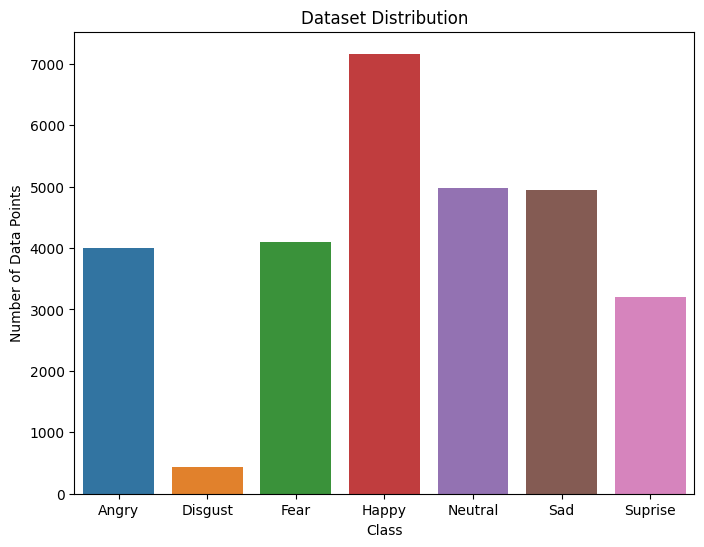

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define custom class names
class_names = {
    0: 'Angry',
    1: 'Disgust',
    2: 'Fear',
    3: 'Happy',
    4: 'Neutral',
    5: 'Sad',
    6: 'Suprise'
}

# Get the class indices and counts from the data generator
class_indices = train_generator.class_indices
class_counts = train_generator.classes

# Count the number of data points in each class
counts = np.bincount(class_counts)

# Plot the dataset
plt.figure(figsize=(8, 6))
sns.barplot(x=[class_names[idx] for idx in class_indices.values()], y=counts)
plt.title('Dataset Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Data Points')
plt.show()


In [4]:
# Define the CNN model architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

In [5]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', 
              
              optimizer=Adam(lr=0.001), 
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, 
                    epochs=epochs, 
                    validation_data=validation_generator,
                    callbacks=callbacks_list
                    )

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/25
226/226 [==============================] - 1538s 7s/step - loss: 2.2386 - accuracy: 0.3226 - val_loss: 2.1863 - val_accuracy: 0.1676 - lr: 0.0010
Epoch 2/25
226/226 [==============================] - 1408s 6s/step - loss: 1.8113 - accuracy: 0.4252 - val_loss: 1.7551 - val_accuracy: 0.4005 - lr: 0.0010
Epoch 3/25
226/226 [==============================] - 1396s 6s/step - loss: 1.6176 - accuracy: 0.4767 - val_loss: 1.5207 - val_accuracy: 0.5120 - lr: 0.0010
Epoch 4/25
226/226 [==============================] - 1368s 6s/step - loss: 1.4741 - accuracy: 0.5158 - val_loss: 1.4494 - val_accuracy: 0.5310 - lr: 0.0010
Epoch 5/25
226/226 [==============================] - 1329s 6s/step - loss: 1.3787 - accuracy: 0.5405 - val_loss: 1.3340 - val_accuracy: 0.5528 - lr: 0.0010
Epoch 6/25
226/226 [==============================] - 1335s 6s/step - loss: 1.3000 - accuracy: 0.5596 - val_loss: 1.2567 - val_accuracy: 0.5726 - lr: 0.0010
Epoch 7/25
226/226 [==============================] - 1294

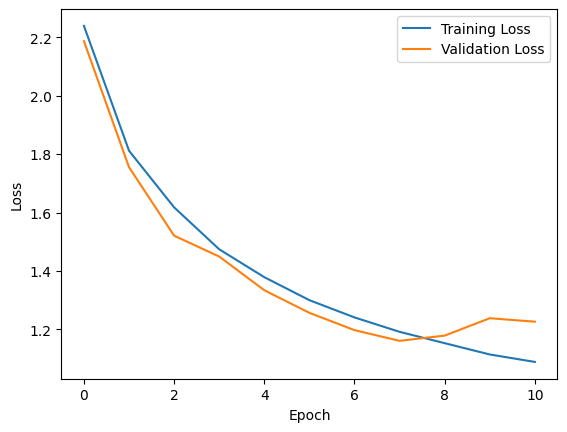

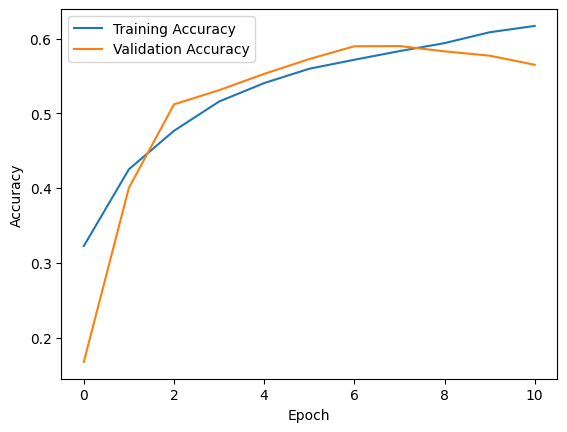

In [7]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')

plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#save the model as a .h5 file
model.save('C:\\Users\\HP\\Documents\\Y4 S1\\research\\models\\filters\\emotions_classification_model_2.h5')

In [10]:
# Load the image you want to classify using OpenCV
img = cv2.imread('D:\\Datasets-research\\Face-expression-recognition-dataset\\images\\train\\happy\\114.jpg')

# Resize the image to the size used for training the model (128x128 pixels)
img = cv2.resize(img, (128, 128))

# Normalize the pixel values to be in the range [0, 1]
img = img / 255.0

# Add a batch dimension to the image so that it has shape (1, 128, 128, 3)
img = np.expand_dims(img, axis=0)

# Pass the image through the model using the model.predict() method
predictions = model.predict(img)

# Find the index of the class with the highest probability using np.argmax()
predicted_class = np.argmax(predictions)

# Print the predicted class
print(predicted_class)

class_indices = validation_generator.class_indices
class_label = list(class_indices.keys())[list(class_indices.values()).index(predicted_class)]
print(class_label)

1/1 [==============================] - 0s 39ms/step
4
neutral
